In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [2]:
df= pd.read_csv('Financial-Campaign-full.csv')#loads the csv file into a pandas dataframe
df.head()

,Age,Job,Marital,Education,Credit?,Balance,HousingLoan,PersonalLoan,Contact,LastDay,LastMonth,ContactDuration,CampaignContacts,Pdays,PreviousContacts,POutcome,Coutcome
0,34,blue-collar,married,secondary,no,7216,yes,no,unknown,26,may,143,2,-1,0,unknown,no
1,29,housemaid,married,secondary,no,823,yes,no,unknown,23,may,14,2,-1,0,unknown,no
2,41,blue-collar,married,primary,no,17,no,no,cellular,8,jul,117,3,-1,0,unknown,no
3,37,technician,married,secondary,no,729,yes,no,cellular,15,jul,115,5,-1,0,unknown,no
4,32,blue-collar,single,secondary,no,15341,no,no,unknown,21,may,738,3,-1,0,unknown,no


## Data Exploration

In [3]:
df.shape # 45000 rows 17 cols, lots of data!


(45208, 17)

There are 10 non numeric columns that we need to consider if we want to include that in our analysis because we will need to convert them to numeric values for clustering purposes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45208 entries, 0 to 45207
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               45208 non-null  int64 
 1   Job               45208 non-null  object
 2   Marital           45208 non-null  object
 3   Education         45208 non-null  object
 4   Credit?           45208 non-null  object
 5   Balance           45208 non-null  int64 
 6   HousingLoan       45208 non-null  object
 7   PersonalLoan      45208 non-null  object
 8   Contact           45208 non-null  object
 9   LastDay           45208 non-null  int64 
 10  LastMonth         45208 non-null  object
 11  ContactDuration   45208 non-null  int64 
 12  CampaignContacts  45208 non-null  int64 
 13  Pdays             45208 non-null  int64 
 14  PreviousContacts  45208 non-null  int64 
 15  POutcome          45208 non-null  object
 16  Coutcome          45208 non-null  object
dtypes: int64(7),

In [5]:
df.dtypes # lots of numbers and strings

Age                  int64
Job                 object
Marital             object
Education           object
Credit?             object
Balance              int64
HousingLoan         object
PersonalLoan        object
Contact             object
LastDay              int64
LastMonth           object
ContactDuration      int64
CampaignContacts     int64
Pdays                int64
PreviousContacts     int64
POutcome            object
Coutcome            object
dtype: object

In [6]:
df.Age.describe()

count    45208.000000
mean        40.935166
std         10.618272
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: Age, dtype: float64

Avg age is 40.9, medium age is 39, oldest is 95, youngest is 18.

This tells us here are alot of middle aged people starting from 30 to 60

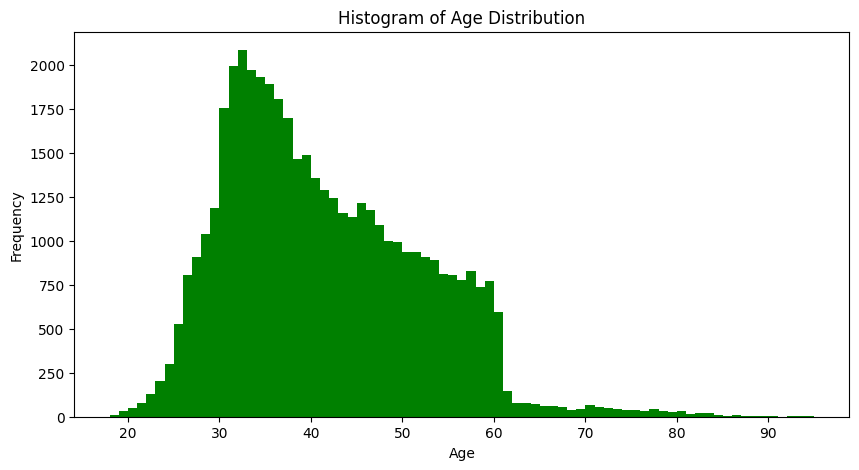

In [7]:
# Age stuff
plt.figure(figsize=(10, 5))
plt.hist(df['Age'].values, rwidth=1, bins =77, color='green')
plt.title('Histogram of Age Distribution')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

The below code is creating a pie chart for all individuals that have above average balances based on their marital status. Throughout our analysis we have also noticed about 26% of all individuals are above the mean (average) balance. We are inferring that the financial institutions marketing campaign for higher balance individuals will only affect 26% of their customers.

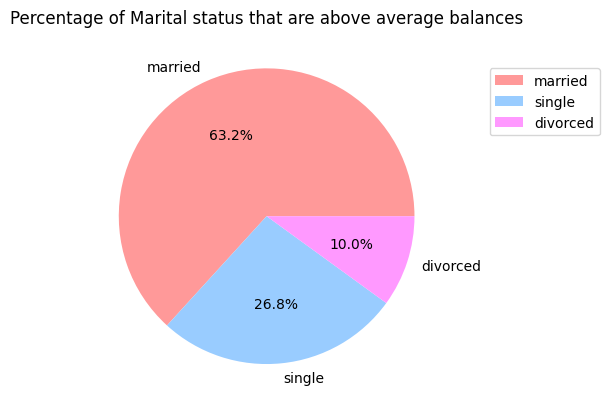

In [8]:
average_balance = df['Balance'].mean()

above_average_bal = len(df[df['Balance'] > average_balance]) #number of people that have above average balances
#df.describe()

marital_titles = df['Marital'].value_counts().index.to_list()


marital_above_average_bal = []
status_total = 0
marital_percentage_above_average_bal = []


for m in marital_titles:
    status_total = df[df['Marital'] == m]
    marital_above_average_bal.append(len(status_total[status_total['Balance'] > average_balance]))

total_count = sum(marital_above_average_bal)
for marital in marital_above_average_bal:
    marital_percentage_above_average_bal.append(marital / total_count * 100)

bar_colors = ['#FF9999', '#99CCFF', '#FF99FF']

plt.pie(marital_percentage_above_average_bal,  colors=bar_colors, labels=marital_titles,autopct='%1.1f%%')

plt.title('Percentage of Marital status that are above average balances')
plt.legend(loc="lower right", bbox_to_anchor=(1.42,0.7))

plt.show()


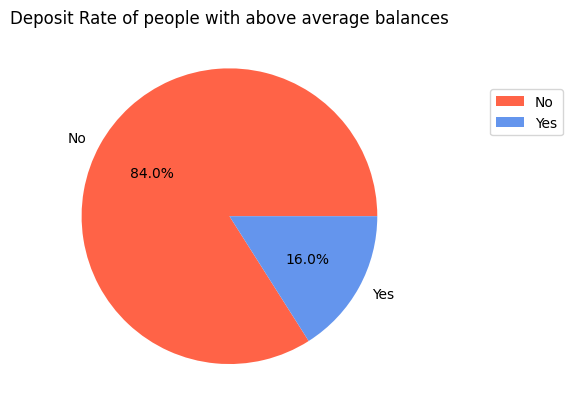

[84.00442666212649, 15.9955733378735]


In [9]:
#people with above average balances
average_balance = df['Balance'].mean()

above_average_bal = df[df['Balance'] > average_balance]

# number of people that put down a term deposit vs people that did not put down a term deposit
NoDeposit = len(above_average_bal[above_average_bal["Coutcome"] =='no'])
YesDeposit = len(above_average_bal[above_average_bal["Coutcome"] =='yes'])

#print(NoDeposit)
#print(YesDeposit)




total_cooutcome = []
total_cooutcome.append(NoDeposit/len(above_average_bal) * 100)
total_cooutcome.append(YesDeposit/len(above_average_bal) * 100)
#plt.bar(above_average_bal['Coutcome'].unique(), above_average_bal["Coutcome"].value_counts(), color=bar_colors, align='center', width=0.5) =
plt.pie(total_cooutcome,  colors=[ 'tomato', 'cornflowerblue'], labels=['No', 'Yes'], autopct='%1.1f%%')


plt.legend(loc="lower right", bbox_to_anchor=(1.42,0.7))
plt.title('Deposit Rate of people with above average balances')

plt.show()
print(total_cooutcome)

<h1> Percentage of Individuals are above the mean (average) balance <h1>

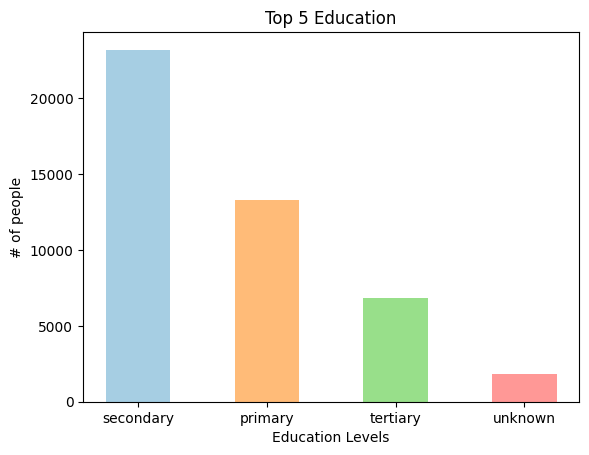

In [10]:
bar_colors = ['#a6cee3', '#ffbb78', '#98df8a', '#ff9896', '#cfa3e3']

plt.bar(df['Education'].unique(), df["Education"].value_counts(), color=bar_colors, align='center', width=0.5)

plt.ylabel('# of people')
plt.xlabel('Education Levels')
plt.title('Top 5 Education')

plt.show()

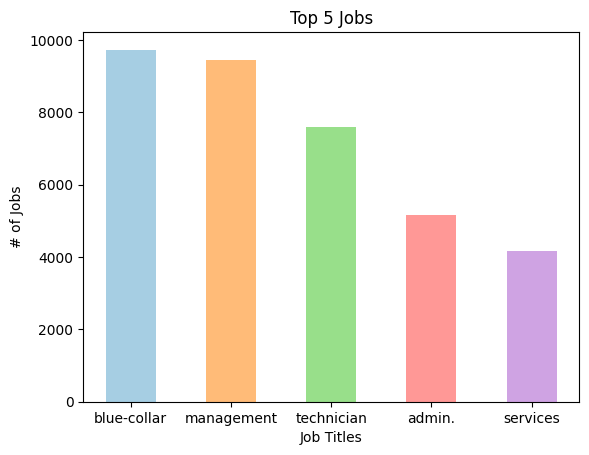

In [11]:
job_title = df['Job'].value_counts()[:5].index.to_list()

job_counts = df['Job'].value_counts()[:5]

# Convert the value counts to a NumPy array
job_counts_array = job_counts.values

#job_title = ['Blue Collar', 'House Maid', 'Technician', 'Management', 'Entrepreneur']

bar_colors = ['#a6cee3', '#ffbb78', '#98df8a', '#ff9896', '#cfa3e3']

plt.bar(job_title, job_counts, color=bar_colors, label=job_title, align='center', width=0.5)

plt.ylabel('# of Jobs')
plt.xlabel('Job Titles')
plt.title('Top 5 Jobs')
#plt.legend(title='Fruit color')

plt.show()



In [12]:
# this is just crude numberization so i can visualize the data
corr_df = pd.read_csv('Financial-Campaign-full.csv')
corr_df['Coutcome'].replace(['yes', 'no'],[1, 0], inplace=True)
corr_df['PersonalLoan'].replace(['yes', 'no'],[1, 0], inplace=True)
corr_df['HousingLoan'].replace(['yes', 'no'],[1, 0], inplace=True)
corr_df['Credit?'].replace(['yes', 'no'],[1, 0], inplace=True)
corr_df['Education'].replace(['tertiary', 'secondary', 'primary', 'unknown'],[3, 2, 1, 0], inplace=True)
corr_df['POutcome'].replace(['success', 'failure', 'other', 'unknown'],[1, -1, 0, 0], inplace=True)
corr_df['Marital'].replace(['married', 'single', 'divorced'],[1, 0, 0], inplace=True)
corr_df['Contact'].replace(['cellular', 'telephone', 'unknown'],[1, -1, 0], inplace=True) # pos cor means more likely to use cell negitive more likely to use landline
# note therer are alot of -1s for Pdays so keep that in mind for pday coralations

In [13]:
corr_df.corr(numeric_only=True)

,Age,Marital,Education,Credit?,Balance,HousingLoan,PersonalLoan,Contact,LastDay,ContactDuration,CampaignContacts,Pdays,PreviousContacts,POutcome,Coutcome
Age,1.000000,0.286206,-0.173553,-0.017867,0.097810,-0.185584,-0.015614,-0.122098,-0.011131,-0.004661,0.004772,-0.023720,0.001313,0.021434,0.025193
Marital,0.286206,1.000000,-0.126187,-0.014453,0.025721,0.017670,0.036930,-0.053751,0.004870,-0.022682,0.031380,-0.027579,-0.012677,-0.005208,-0.060242
Education,-0.173553,-0.126187,1.000000,-0.009040,0.050577,-0.038609,0.004293,0.156952,0.020310,0.002599,0.000195,0.007078,0.025288,0.002866,0.051332
Credit?,-0.017867,-0.014453,-0.009040,1.000000,-0.066747,-0.006023,0.077231,-0.000965,0.008700,-0.010022,0.016820,-0.029983,-0.018332,0.010863,-0.022422
Balance,0.097810,0.025721,0.050577,-0.066747,1.000000,-0.068775,-0.084358,-0.002860,0.003683,0.021564,-0.014582,0.003429,0.016670,0.007178,0.052833
HousingLoan,-0.185584,0.017670,-0.038609,-0.006023,-0.068775,1.000000,0.041331,-0.089806,-0.025065,0.005040,-0.023602,0.124189,0.037081,-0.134464,-0.139172
PersonalLoan,-0.015614,0.036930,0.004293,0.077231,-0.084358,0.041331,1.000000,0.015953,0.010082,-0.012414,0.009976,-0.022766,-0.011051,-0.024311,-0.068196
Contact,-0.122098,-0.053751,0.156952,-0.000965,-0.002860,-0.089806,0.015953,1.000000,0.004500,0.029375,-0.046984,0.170648,0.091907,-0.092323,0.100815
LastDay,-0.011131,0.004870,0.020310,0.008700,0.003683,-0.025065,0.010082,0.004500,1.000000,-0.029757,0.152705,-0.088560,-0.049254,0.041048,-0.027345
ContactDuration,-0.004661,-0.022682,0.002599,-0.010022,0.021564,0.005040,-0.012414,0.029375,-0.029757,1.000000,-0.084568,-0.001566,0.001202,0.036588,0.394536


## Some things we noticed from this correlation chart

Higher age = more likely married, but lower education

people withe cell phones where more likely to have been contacted in prev campaine

higher last contract duration = more likely to have subscribed to term deposit (Coutcome)

People contacted in prev campaine (non -1 pdays) = more likely to have subscribed to term deposit (Coutcome)

The more someone was contacted before the campaine = less likely to have a sucess rating in Poitcome, but more likely to have subscribed to term deposit (Coutcome)

<h2>Data Cleaning<h2>

In [14]:
clean_df = df

<h1>Missing values<h1>

The first step of data cleaning would be to see if there is any values that are null, as you can see there is no null values

In [15]:
 #returns the number of missing values
clean_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Credit?             0
Balance             0
HousingLoan         0
PersonalLoan        0
Contact             0
LastDay             0
LastMonth           0
ContactDuration     0
CampaignContacts    0
Pdays               0
PreviousContacts    0
POutcome            0
Coutcome            0
dtype: int64

The second step of data cleaning would be to see if there are any values that are empty

In [16]:
 #returns the number of missing values
clean_df.isna().sum()

Age                 0
Job                 0
Marital             0
Education           0
Credit?             0
Balance             0
HousingLoan         0
PersonalLoan        0
Contact             0
LastDay             0
LastMonth           0
ContactDuration     0
CampaignContacts    0
Pdays               0
PreviousContacts    0
POutcome            0
Coutcome            0
dtype: int64

<h1>Find all the Job names<h1>

As you can see for Admin role there is an extra period added to the end of the data which we will remove the period from the dataset  

In [17]:
clean_df['Job'].unique()

array(['blue-collar', 'housemaid', 'technician', 'management',
       'entrepreneur', 'admin.', 'services', 'self-employed', 'retired',
       'unemployed', 'unknown', 'student'], dtype=object)

<h1>Find all the month names<h1>

As you can see for lastMonth column there is incorrectly typed Month of may which includes two Y's, we will replace the existing value back to correct format


In [18]:
#Find all the unique month columns
clean_df['LastMonth'].unique()

array(['may', 'jul', 'jun', 'mayY', 'aug', 'oct', 'nov', 'dec', 'jan',
       'feb', 'mar', 'apr', 'sep'], dtype=object)

Entry #13 has an error month is labeled as mayY (drop this record or replace)
jobs has unknown

In [19]:
# We will replace the mayY with may

clean_df['LastMonth'].replace('mayY', 'may', inplace=True)

#We will replace the admin. with admin
clean_df['Job'].replace('admin.', 'admin', inplace=True)


Verifying that month and job columns have clean data

In [20]:
clean_df[(clean_df['LastMonth'] == 'mayY')]

,Age,Job,Marital,Education,Credit?,Balance,HousingLoan,PersonalLoan,Contact,LastDay,LastMonth,ContactDuration,CampaignContacts,Pdays,PreviousContacts,POutcome,Coutcome


In [21]:
clean_df[(clean_df['Job'] == 'admin.')]

,Age,Job,Marital,Education,Credit?,Balance,HousingLoan,PersonalLoan,Contact,LastDay,LastMonth,ContactDuration,CampaignContacts,Pdays,PreviousContacts,POutcome,Coutcome


jobs, Education, Contact(this one may not be issue), POutcome has unknons
Last month has a mayY value
Pdays has a -1 value may not be issue
LastDay has 1 value above 600

<h1>Dropping the LastDay column <h1>

In our findings we found that there was one outlier which had value of 628 which doesn't make sense for LastDay communciated by the financial institute. We also decided that we aren't going to be use the LastDay column in our clustering process so we will drop this column completely

In [22]:
clean_df[(clean_df['LastDay'] == 628)]

,Age,Job,Marital,Education,Credit?,Balance,HousingLoan,PersonalLoan,Contact,LastDay,LastMonth,ContactDuration,CampaignContacts,Pdays,PreviousContacts,POutcome,Coutcome
605,23,blue-collar,single,secondary,no,214,yes,no,unknown,628,may,44,1,-1,0,unknown,no


In [23]:
clean_df = clean_df.drop(columns=['LastDay'])
clean_df = clean_df.drop(columns=['Contact'])
clean_df = clean_df.drop(columns=['POutcome'])

In [24]:
clean_df = clean_df.drop(clean_df[(clean_df['Job'] == 'unknown')].index)

clean_df[(clean_df['Job'] == 'unknown')]

clean_df['Job'].unique()


array(['blue-collar', 'housemaid', 'technician', 'management',
       'entrepreneur', 'admin', 'services', 'self-employed', 'retired',
       'unemployed', 'student'], dtype=object)

In [25]:
clean_df = clean_df.drop(clean_df[(clean_df['Education'] == 'unknown')].index)

clean_df['Education'].unique()

array(['secondary', 'primary', 'tertiary'], dtype=object)

In [26]:
clean_df.replace(['yes', 'no'],[1, 0], inplace=True)

In [27]:
display(clean_df)

,Age,Job,Marital,Education,Credit?,Balance,HousingLoan,PersonalLoan,LastMonth,ContactDuration,CampaignContacts,Pdays,PreviousContacts,Coutcome
0,34,blue-collar,married,secondary,0,7216,1,0,may,143,2,-1,0,0
1,29,housemaid,married,secondary,0,823,1,0,may,14,2,-1,0,0
2,41,blue-collar,married,primary,0,17,0,0,jul,117,3,-1,0,0
3,37,technician,married,secondary,0,729,1,0,jul,115,5,-1,0,0
4,32,blue-collar,single,secondary,0,15341,0,0,may,738,3,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,51,technician,married,tertiary,0,825,0,0,nov,977,3,-1,0,1
45204,71,retired,divorced,primary,0,1729,0,0,nov,456,2,-1,0,1
45205,72,retired,married,secondary,0,5715,0,0,nov,1127,5,184,3,1
45206,57,blue-collar,married,secondary,0,668,0,0,nov,508,4,-1,0,0


<h1> We wil come back and decide if we want to drop anymore columns !!!!!!! <h1>

Clustering Ideas

best month for marketting campaign

avg # contacts per month

new vs old people Coutcome



This financial institution is very new considering the number of new

In [28]:
#df['POutcome'].value_counts()

#df[(df['Pdays'] == -1)]['POutcome'].value_counts()]

#36951
#failure     4901


# New marketing campaign reached a broader audience but overal the percenetage of success was very low
#df[(df['Pdays'] == -1)]["Coutcome"].value_counts()

# Old
current_customers = clean_df[(clean_df['Pdays'] != -1)].value_counts().reset_index()
current_customers
#df[(df['Pdays'] == -1)][['Pdays', 'POutcome']].value_counts()

,Age,Job,Marital,Education,Credit?,Balance,HousingLoan,PersonalLoan,LastMonth,ContactDuration,CampaignContacts,Pdays,PreviousContacts,Coutcome,0
0,18,student,single,primary,0,608,0,0,nov,210,1,93,1,1,1
1,44,blue-collar,married,tertiary,0,1371,0,0,may,788,3,363,4,0,1
2,44,blue-collar,married,secondary,0,3060,1,0,nov,113,1,189,2,0,1
3,44,blue-collar,married,secondary,0,3060,1,0,apr,87,2,151,3,0,1
4,44,blue-collar,married,secondary,0,2979,1,0,may,18,5,178,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7907,34,management,single,tertiary,0,-444,1,1,apr,129,2,148,4,0,1
7908,34,management,married,tertiary,0,8000,0,0,feb,291,1,260,2,1,1
7909,34,management,married,tertiary,0,5878,0,0,jan,159,7,98,3,0,1
7910,34,management,married,tertiary,0,4859,0,0,aug,262,2,112,2,0,1


<h1>Selection and Clustering<h1>

In [29]:
#categorical_cols = ['City','Gender']

jobs = clean_df['Job']

categorical_cols = ['Job','LastMonth','Marital']
# loc is a indexer to select all rows (:) , X_cat will be a 2D NumPy array containing the values from the 'LastMonth' columns of df.
X_cat = clean_df.loc[:,categorical_cols].values
data_other_cols = clean_df.drop(columns=categorical_cols)

#print(X_cat)
#print(X_cat.shape)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_cat)
feature_names = enc.get_feature_names_out(categorical_cols)
print(feature_names)
X_cat_new = enc.transform(X_cat)
print(X_cat_new.shape)

['Job_admin' 'Job_blue-collar' 'Job_entrepreneur' 'Job_housemaid'
 'Job_management' 'Job_retired' 'Job_self-employed' 'Job_services'
 'Job_student' 'Job_technician' 'Job_unemployed' 'LastMonth_apr'
 'LastMonth_aug' 'LastMonth_dec' 'LastMonth_feb' 'LastMonth_jan'
 'LastMonth_jul' 'LastMonth_jun' 'LastMonth_mar' 'LastMonth_may'
 'LastMonth_nov' 'LastMonth_oct' 'LastMonth_sep' 'Marital_divorced'
 'Marital_married' 'Marital_single']
(43190, 26)


In [30]:
data_hot_encoded = pd.DataFrame(X_cat_new.toarray(),index=clean_df.index,columns=feature_names)
data_hot_encoded.to_csv('new_Data.csv',sep=',')

data_hot_encoded.head()




,Job_admin,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,...,LastMonth_jul,LastMonth_jun,LastMonth_mar,LastMonth_may,LastMonth_nov,LastMonth_oct,LastMonth_sep,Marital_divorced,Marital_married,Marital_single
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
new_df = pd.concat([data_other_cols,data_hot_encoded],axis =1)

new_df.to_csv('new_Data.csv',sep=',')

new_df.columns.tolist()


clean_df = new_df

clean_df


,Age,Education,Credit?,Balance,HousingLoan,PersonalLoan,ContactDuration,CampaignContacts,Pdays,PreviousContacts,...,LastMonth_jul,LastMonth_jun,LastMonth_mar,LastMonth_may,LastMonth_nov,LastMonth_oct,LastMonth_sep,Marital_divorced,Marital_married,Marital_single
0,34,secondary,0,7216,1,0,143,2,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,29,secondary,0,823,1,0,14,2,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,primary,0,17,0,0,117,3,-1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,37,secondary,0,729,1,0,115,5,-1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,secondary,0,15341,0,0,738,3,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,51,tertiary,0,825,0,0,977,3,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45204,71,primary,0,1729,0,0,456,2,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
45205,72,secondary,0,5715,0,0,1127,5,184,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45206,57,secondary,0,668,0,0,508,4,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


<h1>First Feature Selection<h1>

For this clustering analysis, we decided to chose balance and age columns

In [32]:
# X1 = new_df.loc[:,['LastMonth_apr' ,'LastMonth_aug' ,'LastMonth_dec', 'LastMonth_feb',
#  'LastMonth_jan' , 'LastMonth_jul' , 'LastMonth_jun',  'LastMonth_mar',
#  'LastMonth_may',  'LastMonth_nov' , 'LastMonth_oct',  'LastMonth_sep','Coutcome_no','Coutcome_yes']].values

#X1 = new_df.loc[:,['LastMonth_apr', 'CampaignContacts', 'Pdays']].values

#X1 = current_customers.loc[:,['Balance', 'Age','ContactDuration','CampaignContacts','Pdays','PreviousContacts']].values

#X2 = current_customers.loc[:,['Balance', 'Age']].values
#X2
X2 = clean_df[['Balance', 'Age']].values


In [33]:
#scaler = MinMaxScaler().fit(X2)
scaler = StandardScaler().fit(X2)
X2 = scaler.transform(X2)

In [34]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X2)for k in range(1,9)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[86379.9999999998,
 55661.728658236694,
 34517.125644092586,
 26659.347567088847,
 21040.40906794298,
 17628.912534873063,
 15385.719143895338,
 13341.701069791377]

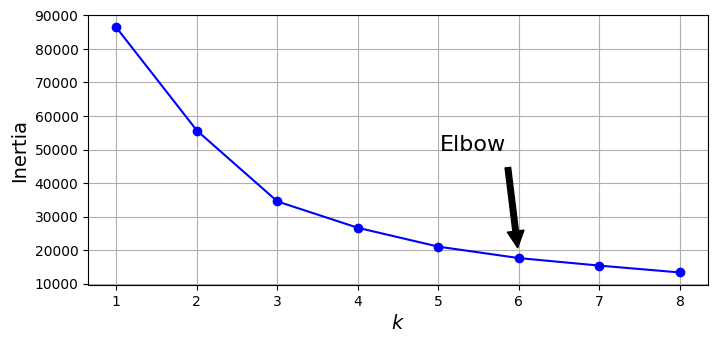

In [35]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 9), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.grid(True)
plt.ylabel("Inertia", fontsize=14)

plt.annotate('Elbow',
             xy=(6, inertias[5]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

#plt.axis([1, 8.5, 0, 1300])

plt.show()

In [36]:
k = 6
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X2)
len(y_pred)

43190

In [37]:
kmeans.cluster_centers_

array([[-2.44896563e-01,  2.49031985e-01],
       [ 1.59674900e+00, -7.82230418e-04],
       [-2.37842723e-01, -8.69545062e-01],
       [ 1.55831501e+01,  1.00555377e+00],
       [-8.34719020e-02,  1.53119777e+00],
       [ 5.17753579e+00,  3.25216765e-01]])

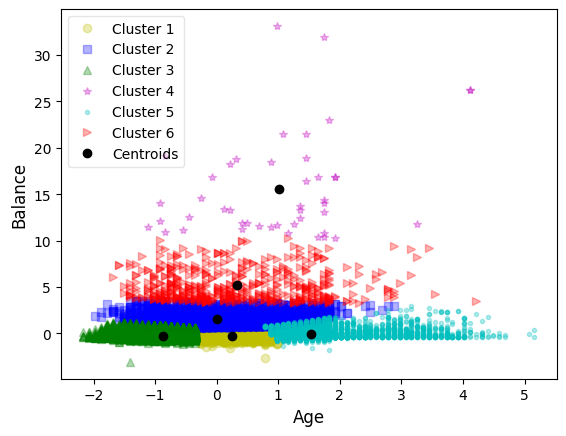

In [38]:
plt.plot(X2[y_pred==0, 1], X2[y_pred==0, 0], "yo", label="Cluster 1", alpha=0.3)
plt.plot(X2[y_pred==1, 1], X2[y_pred==1, 0], "bs", label="Cluster 2", alpha=0.3)
plt.plot(X2[y_pred==2, 1], X2[y_pred==2, 0], "g^", label="Cluster 3", alpha=0.3)
plt.plot(X2[y_pred==3, 1], X2[y_pred==3, 0],"m*", label="Cluster 4", alpha=0.3)
plt.plot(X2[y_pred==4, 1], X2[y_pred==4, 0], "c.", label="Cluster 5", alpha=0.3)
plt.plot(X2[y_pred==5, 1], X2[y_pred==5, 0], "r>", label="Cluster 6", alpha=0.3)

plt.plot(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], "ko", label="Centroids", alpha=1, ms=6)

plt.xlabel("Age", fontsize=12)
plt.legend(loc="upper left", fancybox=True, framealpha=0.5)
plt.ylabel("Balance", fontsize=12)
plt.show()

##Result
When reading these results it's important to note mean age and balance are 40 and 1362, with their standard deviations are 10.6 and 3044.

This graph helps us visualize all the distinct age/financial demographics of the firm's clients.

**C1**: Older people nearing or in retirement with lower to medium balances, these people likely aren't too focused on growing wealth long term as their already a bit older, but still make up a good chunk of the client base.

**C2**: These are the working class (by age), people who have had some success building wealth and could be considered middle-class, probably the firm's second most valuable clients.

**C3**: These are slightly older middle-aged people who have not had the same kind of success building wealth as C2 but still make investments.

**C4**: These people would be considered the very-wealthy top clients, they have had more time to build their wealth and are a bit older, they are highly valued customers but since there are so few of them they are not the most valued client segment.

**C5**: These are people who have made it in life you could say, age-wise they are very spread out, but they have much more wealth and are some of the firm's most valuable clients.

**C6**: Younger to middle-aged people who are just starting out trying to build out some wealth, they don't have that much money but are likely to have a much longer time horizon for investments due to their younger age, building brand loyalty would be very important for this cluster as many of these clients could go on to be life long clients.

**Advice for future marketing campaigns:**

Based on the above analysis for the next marketing campaign I would recommend spending a bit less effort advertising to the older people of C1 who don't have as much wealth, and move that manpower towards advertising towards middle-aged people who've got a bit more time and disposable income for investments as those are the people who ultimately become some of the firms higher balanced clients. That's not to say older people should be ignored as they are still a big chunk of the client base, just that they should be focused on less.

Additionally, I would say a small team should be dedicated to advertising to the very wealthy, this firm's only got a shoe in the door with that client segment, but if it could grow that client segment the firm would benefit greatly.

##Additional Analysis

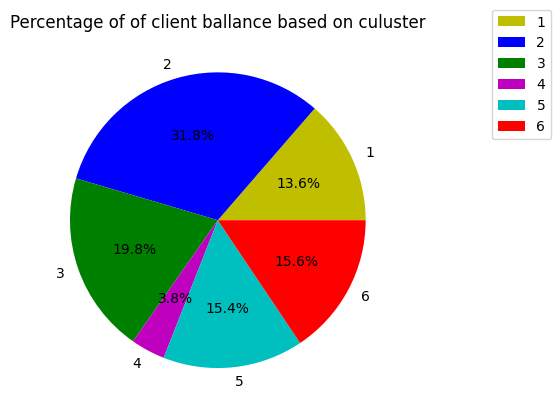

In [39]:
X3 = pd.DataFrame((clean_df[['Balance', 'Age']]))
X3["cluster"] = y_pred

X3 = X3.groupby("cluster").sum()
total = X3[['Balance']].sum()
X3['total'] = (X3['Balance'] / total.values) * 100

X3.total.values

plt.pie(X3.total.values, labels=[1,2,3,4,5,6], colors=['y', 'b', 'g', 'm', 'c', 'r'] ,autopct='%1.1f%%')

plt.title('Percentage of of client ballance based on culuster')
plt.legend(loc="lower right", bbox_to_anchor=(1.42,0.7))

plt.show()


#Second Feature Selection

In [40]:
categorical_cols = ['Balance', 'ContactDuration']
X = clean_df.loc[:, categorical_cols].values
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [41]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X) for k in range(1,9)]
inertias = [model.inertia_ for model in kmeans_per_k]

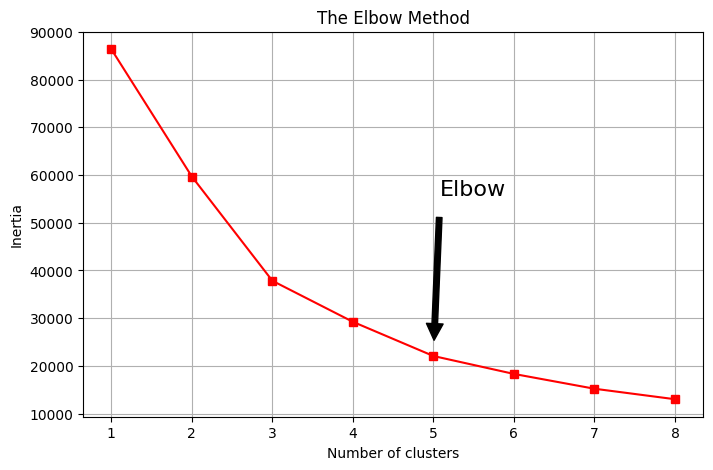

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 9), inertias, "rs-")
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [43]:
k=5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([3, 0, 0, ..., 1, 4, 4], dtype=int32)

In [44]:
kmeans.cluster_centers_

array([[-2.20858565e-01, -4.40105478e-01],
       [ 4.05455423e-03,  3.48670824e+00],
       [ 9.02490494e+00, -5.11948406e-02],
       [ 1.99260170e+00, -1.62401075e-01],
       [-1.71440663e-01,  8.36398010e-01]])

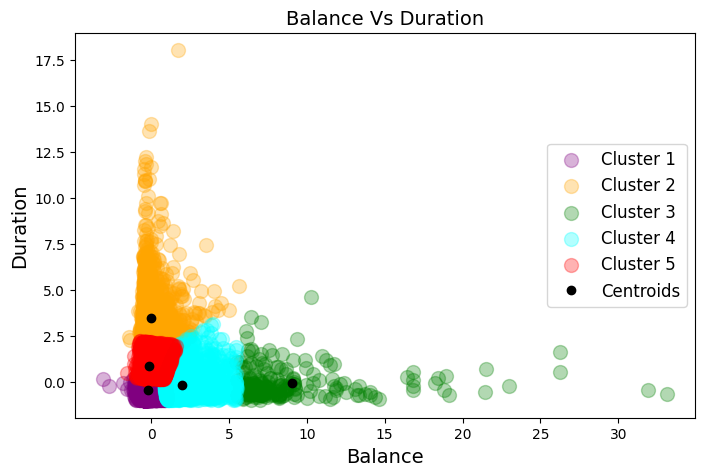

In [46]:
plt.figure(figsize=(8, 5))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=100, c='purple', marker='o', label='Cluster 1', alpha=0.3)
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=100, c='orange', marker='o', label='Cluster 2', alpha=0.3)
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=100, c='green', marker='o', label='Cluster 3', alpha=0.3)
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s=100, c='cyan', marker='o', label='Cluster 4', alpha=0.3)
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s=100, c='red', marker='o',  label='Cluster 5', alpha=0.3)

plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], "ko", label="Centroids", alpha=1, ms=6)

plt.title('Balance Vs Duration' , fontsize=14)
plt.xlabel('Balance' , fontsize=14)
plt.ylabel('Duration' , fontsize=14)
#plt.grid('true')
plt.legend(loc ="center right", fontsize=12 )
plt.show()

##Results
When reading these results it's important to note mean contact durration and balance are 258 and 1362, with their standard deviations are 257 and 3044.

This graph helps us understand the relation between contact duration and client balances.

**C1:** People with a low balance but have spent a bit longer engaged with marketing.

**C2:** People who have spent between now time and a moderate time engaged with marketing and have a moderate balance.

**C3:** People who have spent a low to moderate amount of time engaged with marketing and have a moderate to very high balance.

**C4:** These people have spent between a moderate amount to a very high amount engaged with marketing but only have a low to moderate balance.

**C5:** These the people with the lowest balance and lowest amount of time spent with marketing

**Advice for future marketing campaigns:**

There is one main takeaway from this information, higher contact duration does not equid higher balances, so our advice for the firm is not to stress the quantity of time people are engaged with marketing but the quality of the marketing, this is proven by C3 of all of the highest balance clients almost all of them have low contact durations. Considering how C4 is full of low balance high contact time clients, we would recommend placing a limit on how long an agent should stay on the phone with an individual client so that they can spend more time contacting other potential clients.

#Third Feature Selection

In [47]:
# cleaning
X3 = pd.read_csv('Financial-Campaign-full.csv')
X3['LastMonth'].replace('mayY', 'may', inplace=True)
X3['Job'].replace('admin.', 'admin', inplace=True)
X3 = X3[X3['LastDay'] != 628]
# catagorical to numaric
X3 = X3.replace(['yes', 'no'],[1, 0])
X3 = X3.replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],[1,2,3,4,5,6,7,8,9,10,11,12])

days = X3['LastDay'].values.reshape(-1, 1)
scaler = MinMaxScaler().fit(days)
X3["LastDay"] = (scaler.transform(days))
X3["last"] = X3.LastDay + X3.LastMonth
X3 = X3[["Balance", "CampaignContacts", "last"]]
scaler = MinMaxScaler().fit(X3)
X3 = scaler.transform(X3)

In [48]:
pd.DataFrame(X3).describe()

,0,1,2
count,45207.000000,45207.000000,45207.000000
mean,0.085172,0.028450,0.462386
std,0.027644,0.049970,0.207211
min,0.000000,0.000000,0.000000
25%,0.073457,0.000000,0.346479
50%,0.076871,0.016129,0.416901
75%,0.085768,0.032258,0.588732
max,1.000000,1.000000,1.000000


In [49]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X3) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

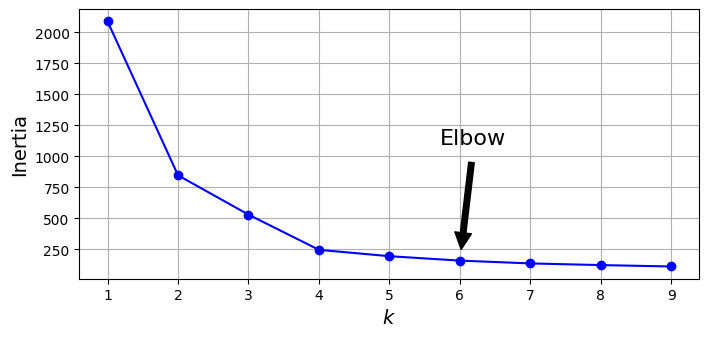

In [50]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.grid(True)
plt.ylabel("Inertia", fontsize=14)

plt.annotate('Elbow',
             xy=(6, inertias[5]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

#plt.axis([1, 8.5, 0, 1300])

plt.show()

In [51]:
k=6
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X3)
y_pred

array([0, 0, 2, ..., 1, 1, 1], dtype=int32)

In [52]:
kmeans.cluster_centers_

array([[0.08624392, 0.02417606, 0.42430964],
       [0.09524774, 0.01401359, 0.86826897],
       [0.08350267, 0.03075509, 0.58517652],
       [0.08416989, 0.01847307, 0.08457057],
       [0.08277383, 0.01905428, 0.33818129],
       [0.08318146, 0.26349125, 0.55159259]])

<ipython-input-53-b26e11936809>:3: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


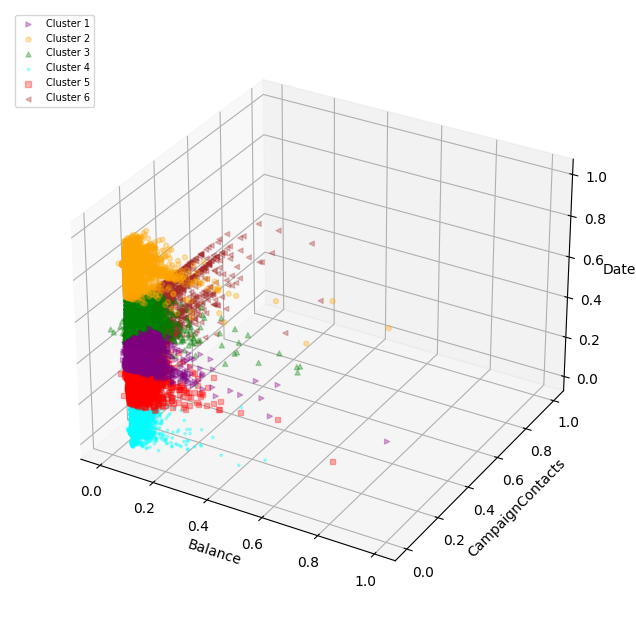

In [53]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.dist = 11
ax.scatter(X3[y_pred == 0, 0], X3[y_pred == 0, 1], X3[y_pred == 0, 2], s=13, c='purple', marker='>', label='Cluster 1', alpha=0.3)
ax.scatter(X3[y_pred == 1, 0], X3[y_pred == 1, 1], X3[y_pred == 1, 2], s=13, c='orange', marker='o', label='Cluster 2', alpha=0.3)
ax.scatter(X3[y_pred == 2, 0], X3[y_pred == 2, 1], X3[y_pred == 2, 2], s=13, c='green', marker='^', label='Cluster 3', alpha=0.3)
ax.scatter(X3[y_pred == 3, 0], X3[y_pred == 3, 1], X3[y_pred == 3, 2], s=13, c='cyan', marker='.', label='Cluster 4', alpha=0.3)
ax.scatter(X3[y_pred == 4, 0], X3[y_pred == 4, 1], X3[y_pred == 4, 2], s=13, c='red', marker='s',  label='Cluster 5', alpha=0.3)
ax.scatter(X3[y_pred == 5, 0], X3[y_pred == 5, 1], X3[y_pred == 5, 2], s=13, c='brown', marker='<',  label='Cluster 6', alpha=0.3)
ax.set_xlabel("Balance")
ax.set_ylabel('CampaignContacts')
ax.set_zlabel('Date')
plt.legend(loc ="upper left", fontsize=7)

plt.show()

##Results
When reading these results it's important to note date from 0 to 1 represents the start to end of a year.

This graph helps us understand .

**C1:**

**C2:**

**C3:**

**C4:**

**C5:**

**Advice for future marketing campaigns:**

##Fouth Feature Selection


In [54]:
'''
categorical_cols = ['Job_admin','Job_blue-collar','Job_entrepreneur',
                    'Job_housemaid','Job_management','Job_retired',
                    'Job_self-employed','Job_services','Job_student',
                    'Job_technician','Job_unemployed','Age','Balance','Credit?']
'''
categorical_cols = ['Age','Balance' , 'Credit?' , 'PersonalLoan']

#categorical_cols = ['CampaignContacts']

X = clean_df.loc[:, categorical_cols].values

scaler = MinMaxScaler().fit(X)


#job_columns = [col for col in new_df.columns if col.startswith('Job_')]

#job_columns

In [ ]:
X = scaler.transform(X)
X

In [56]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

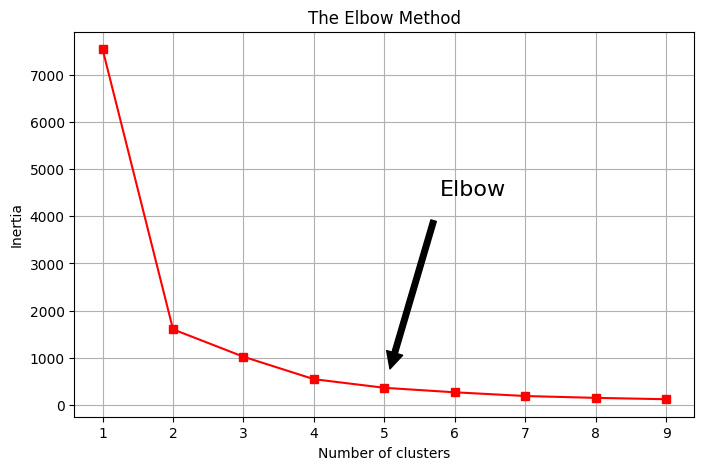

In [57]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, "rs-")
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [58]:

kmeans = KMeans(n_clusters=7, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred


array([0, 0, 6, ..., 2, 2, 0], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


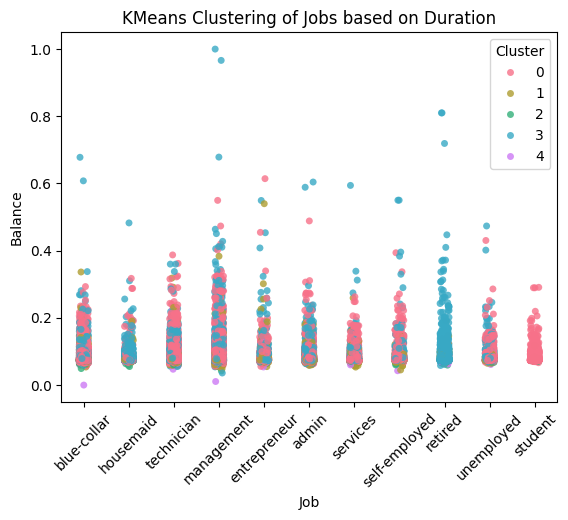

0    22723
3    12869
1     6816
2      491
4      291
Name: Cluster, dtype: int64


In [59]:
'''
categorical_cols = ['Job_admin','Job_blue-collar','Job_entrepreneur',
                    'Job_housemaid','Job_management','Job_retired',
                    'Job_self-employed','Job_services','Job_student',
                    'Job_technician','Job_unemployed', 'Age','Balance','Credit?'] #,'Age','Balance
'''

categorical_cols = ['Age','Balance' , 'Credit?' , 'PersonalLoan']

test_df = clean_df.loc[:, categorical_cols]
#test_df = current_customers.loc[:, categorical_cols]

# Scale numerical variables (optional but recommended for KMeans)
#test_df['CampaignContacts'] = scaler.fit_transform(test_df[['CampaignContacts']])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

test_df['Age'] = scaler.fit_transform(test_df[['Age']])
test_df['Balance'] = scaler.fit_transform(test_df[['Balance']])
test_df['Credit?'] = scaler.fit_transform(test_df[['Credit?']])
test_df['PersonalLoan'] = scaler.fit_transform(test_df[['PersonalLoan']])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
test_df['Cluster'] = kmeans.fit_predict(test_df)


#display(test_df)
# Define a custom color palette with 7 distinct colors
custom_palette = sns.color_palette("husl", 5)

# Visualize the clusters using seaborn
sns.stripplot(data=test_df, x=jobs, y='Balance', hue='Cluster',palette=custom_palette,alpha=0.8)
# Rotate x-axis labels
plt.xticks(rotation=45)

plt.title('KMeans Clustering of Jobs based on Duration')
plt.show()

print(test_df['Cluster'].value_counts())
